In [243]:
import sys,cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import albumentations as A

In [244]:
image = cv2.imread('/mnt/data_lab513/dhsang/data/256x256/ISIC_0000011.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [245]:
image.shape

(256, 256, 3)

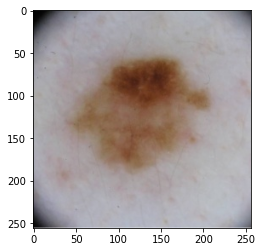

In [246]:
imgplot = plt.imshow(image)
plt.grid(False)
plt.show()

In [247]:
image_transformation_2 = [
                A.Transpose(p=0.5),
                A.VerticalFlip(p=0.5),
                A.HorizontalFlip(p=0.5),
                A.RandomBrightness(limit=0.2, p=0.75),
                A.RandomContrast(limit=0.2, p=0.75),
                A.OneOf([
                    A.MotionBlur(blur_limit=5),
                    A.MedianBlur(blur_limit=5),
                    A.GaussianBlur(blur_limit=5),
                    A.GaussNoise(var_limit=(5.0, 30.0)),
                ], p=0.7),

                A.OneOf([
                    A.OpticalDistortion(distort_limit=1.0),
                    A.GridDistortion(num_steps=5, distort_limit=1.),
                    A.ElasticTransform(alpha=3),
                ], p=0.7),

                A.CLAHE(clip_limit=4.0, p=0.7),
                A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.5),
                A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, border_mode=0, p=0.85),
                A.Cutout(max_h_size=int(256 * 0.375), max_w_size=int(256 * 0.375), num_holes=1, p=0.7),     
                A.Normalize()  
            ]

In [248]:
image_transformation_2 = A.Compose(image_transformation_2)

In [249]:
transformed =image_transformation_2(image=image)
image = transformed["image"]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


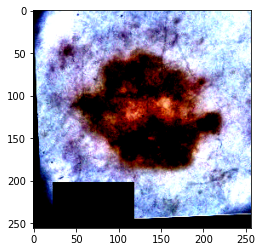

In [250]:
imgplot = plt.imshow(image)
plt.grid(False)
plt.show()

In [251]:
image.shape,type(image)

((256, 256, 3), numpy.ndarray)

In [252]:
import torch
image = torch.tensor(image).float()
image.shape,type(image)


(torch.Size([256, 256, 3]), torch.Tensor)